In [ ]:
!git config --global user.name 'Neazekal'
!git config --global user.email 'neazekal@gmail.com'
!git config --global user.password 'ngkhoa10'

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HPG 1D.csv')
data['date'] = pd.to_datetime(data['date'])
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2022-12-31')
data = data[data['date'].between(start_date, end_date)]
data = data.reset_index()

In [ ]:
data

,index,date,open,high,low,close,Volume
0,2225,2021-01-04,23931.63949,24501.44043,23732.20916,24102.57977,30576652
1,2226,2021-01-05,23817.67930,24387.48024,23760.69921,24131.06982,32702823
2,2227,2021-01-06,24216.53996,24672.38071,24102.57977,24387.48024,34781619
3,2228,2021-01-07,24586.91057,24615.40062,24074.08972,24387.48024,45396554
4,2229,2021-01-08,24444.46033,24672.38071,24273.52005,24358.99019,36074703
...,...,...,...,...,...,...,...
494,2719,2022-12-26,18300.00000,18300.00000,17100.00000,17100.00000,36845000
495,2720,2022-12-27,17100.00000,18250.00000,17100.00000,18250.00000,24390000
496,2721,2022-12-28,18400.00000,18500.00000,17950.00000,18200.00000,15786200
497,2722,2022-12-29,18300.00000,18500.00000,17850.00000,18000.00000,17469800


In [ ]:
psd = np.abs(np.fft.fft(data['close']))**2

In [ ]:
freqs = np.fft.fftfreq(len(psd))

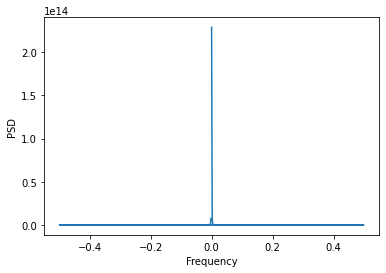

In [ ]:
plt.plot(freqs, psd)
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()

In [ ]:
result = adfuller(data['close'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.501757
p-value: 0.891673
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


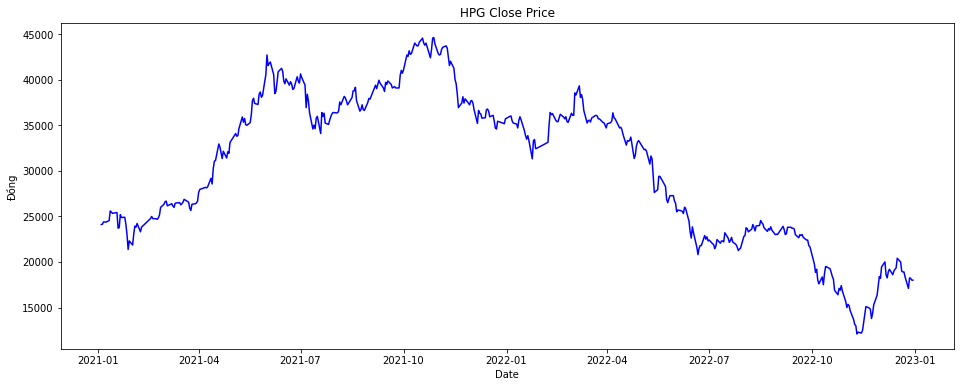

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x='date', y='close', data=data, color='blue')
plt.title('HPG Close Price')
plt.xlabel('Date')
plt.ylabel('Đồng')
plt.show()

<Figure size 1440x360 with 0 Axes>

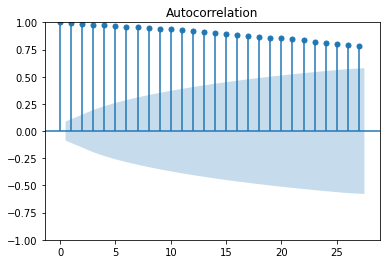

In [ ]:
plt.figure(figsize=(20,5))
ax3 = plot_acf(data['close'])

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1440x360 with 0 Axes>

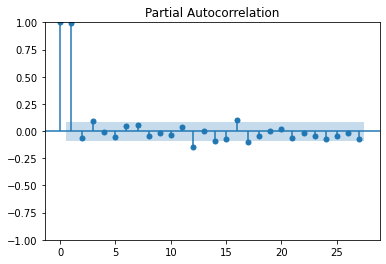

In [ ]:
plt.figure(figsize=(20,5))
ax4 = plot_pacf(data['close'])

In [ ]:
model = ARIMA(data['close'], order=(2, 1, 5))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  499
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -3980.781
Date:                Mon, 20 Mar 2023   AIC                           7977.561
Time:                        00:27:34   BIC                           8011.246
Sample:                             0   HQIC                          7990.781
                                - 499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0740      0.178      0.416      0.677      -0.275       0.423
ar.L2          0.8026      0.180      4.462      0.000       0.450       1.155
ma.L1         -0.0115      0.177     -0.065      0.9

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
window = 30
prediction = []
input = []
output = []
forecast = []
for i in range(window, len(data)):
    try:
        input_data = data['close'].values[i-window:i]
        model = ARIMA(input_data, order=(2, 1, 5))
        model_fit = model.fit()
        output_data = data['close'].values[i]
        input.append(input_data)
        output.append(output_data)
        prediction = model_fit.forecast(steps=1)
        forecast.append(prediction)
    except LinAlgError:
        continue

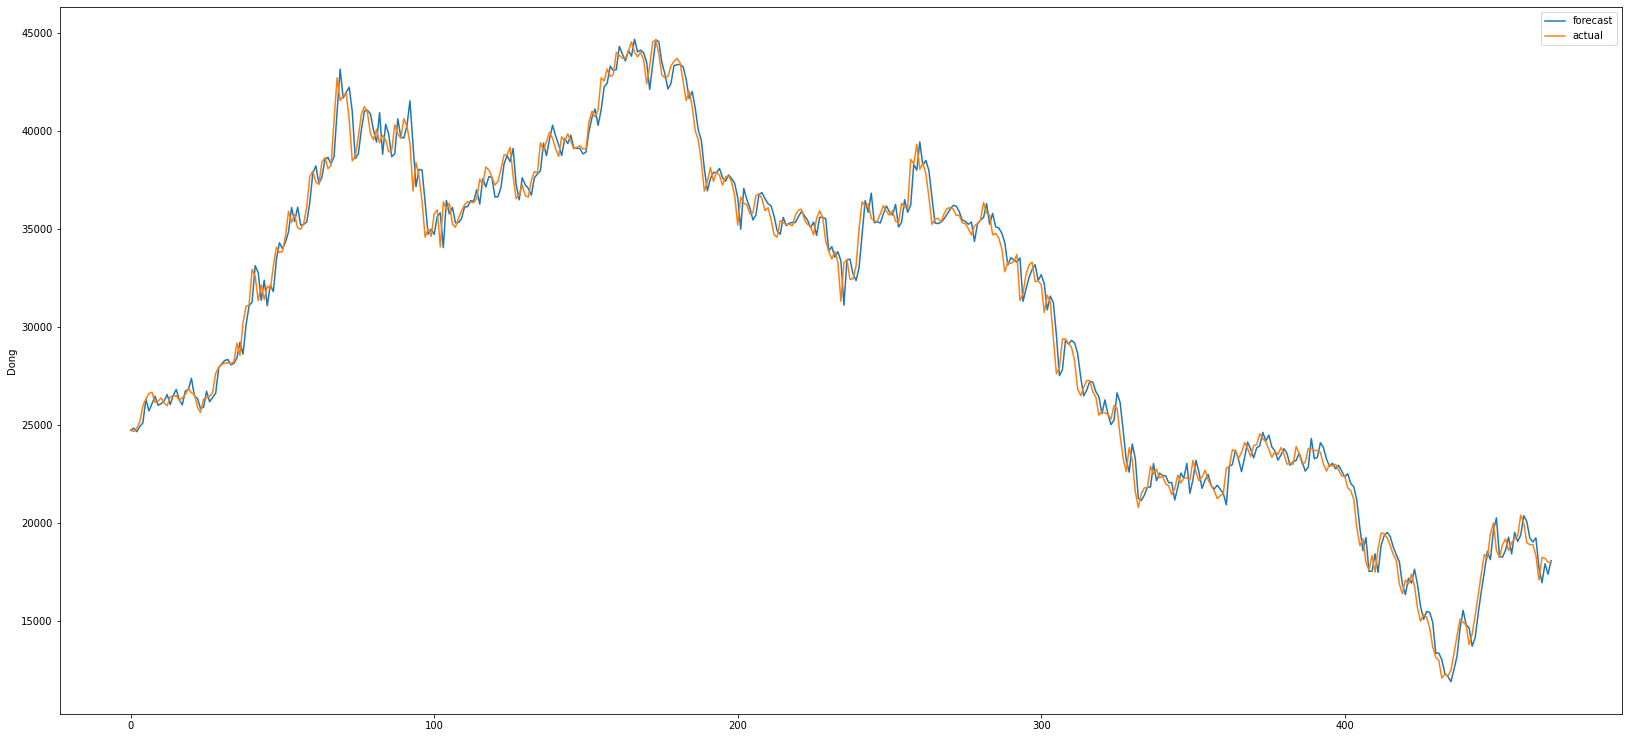

In [ ]:
plt.figure(figsize=(28, 13))
plt.plot(forecast, label='forecast')
plt.plot(output, label='actual')
plt.legend()
plt.ylabel("Dong")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
output1 = np.array(output)
forecast1 = np.array(forecast)

In [ ]:
mape = np.mean(np.abs((output1 - forecast1) / output1)) 
mape

0.35725741431733143

In [ ]:
mae = mean_absolute_error(output1, forecast1)
mae

582.0633134428703

In [ ]:
rmse = np.sqrt(mean_squared_error(output1, forecast1))
rmse

764.5804986119372